Problem 1: PCA

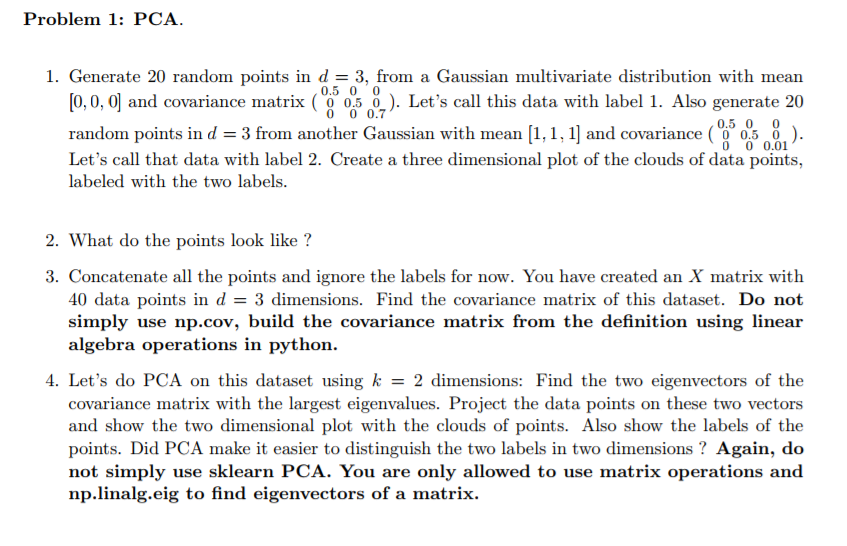

In [4]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

import scipy as sp
import pylab as pl
from scipy import misc
from scipy import linalg

import pandas

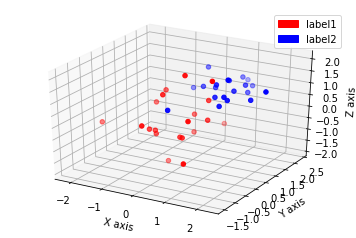

In [5]:
u1 = [0, 0, 0]
covMatrix1 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]]

u2 = [1, 1, 1]
covMatrix2 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.1]]

x1, y1, z1 = np.random.multivariate_normal(u1, covMatrix1, 20).T
x2, y2, z2 = np.random.multivariate_normal(u2, covMatrix2, 20).T

matrix1 = np.column_stack((x1,y1,z1))
matrix2 = np.column_stack((x2,y2,z2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='r', marker='o')
ax.scatter(x2, y2, z2, c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

The points looks somewhat random and scattered, though the label1 points are clustered together as are the label2 points. Both groups of points look to be spread apart throughout the x axis and y axis with little dispersion through the z axis.

In [6]:
x = np.append(x1,x2)
y = np.append(y1,y2)
z = np.append(z1,z2)

matrix = np.column_stack((x,y,z))

mean = np.mean(matrix, axis=0)
varX = np.sum(np.square(matrix[:,0]-mean[0]))/len(matrix)
varY = np.sum(np.square(matrix[:,1]-mean[1]))/len(matrix)
varZ = np.sum(np.square(matrix[:,2]-mean[2]))/len(matrix)

CovXY = np.sum((matrix[:,0]-mean[0]) * (matrix[:,1]-mean[1]))/len(matrix)
CovXZ = np.sum((matrix[:,0]-mean[0]) * (matrix[:,2]-mean[2]))/len(matrix)
CovYZ = np.sum((matrix[:,1]-mean[1]) * (matrix[:,2]-mean[2]))/len(matrix)

coMatrix = np.array([[varX, CovXY, CovXZ], [CovXY, varY, CovYZ], [CovXZ, CovYZ, varZ]])

print "The covariance matrix is"
print coMatrix

The covariance matrix is
[[ 0.75199832  0.13157038  0.37365814]
 [ 0.13157038  0.78012996  0.1728357 ]
 [ 0.37365814  0.1728357   0.77176743]]


Let’s do PCA on this dataset using k = 2 dimensions: Find the two eigenvectors of the
covariance matrix with the largest eigenvalues. Project the data points on these two vectors
and show the two dimensional plot with the clouds of points. Also show the labels of the
points. Did PCA make it easier to distinguish the two labels in two dimensions ? Again, do
not simply use sklearn PCA. You are only allowed to use matrix operations and
np.linalg.eig to find eigenvectors of a matrix.

In [7]:
dictEig = {}
matEig = np.linalg.eig(coMatrix)
#make a dictionary of eigevalues and their eigenvectors
for vec in range(len(matEig[0])):
    dictEig[matEig[0][vec]] = matEig[1][:, vec]
#sort eigenvalues
sortEig = np.sort(np.linalg.eig(coMatrix)[0])

k = 2

#make sorted eigenmatrix with k vectors
kmatEig = [] 
for vec in range(k):
    eigV = dictEig[sortEig[k-vec]].T
    print eigV

#TODO add rows to kmatEig based on for loop

[-0.62134103 -0.42700147 -0.65696657]
[ 0.35576878 -0.90079225  0.24900181]


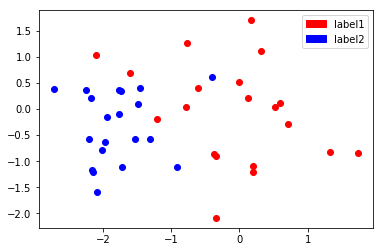

In [8]:
e1 = np.linalg.eig(coMatrix)[1][:, 0]
e2 = np.linalg.eig(coMatrix)[1][:, 2]

eigenv = np.column_stack((e1.T, e2.T))

proj1 = np.dot(matrix1, eigenv)
proj2 = np.dot(matrix2, eigenv)

newx1 = proj1[:, 0]
newy1 = proj1[:, 1]

newx2 = proj2[:, 0]
newy2 = proj2[:, 1]

plt.plot(newx1, newy1, "o", c= 'r')
plt.plot(newx2, newy2, "o", c= 'b')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

Yes, PCA did make is easier to distinguish the two labels in two dimensions. The variance of the points is clear in the x and y axes with the third dimension gone.

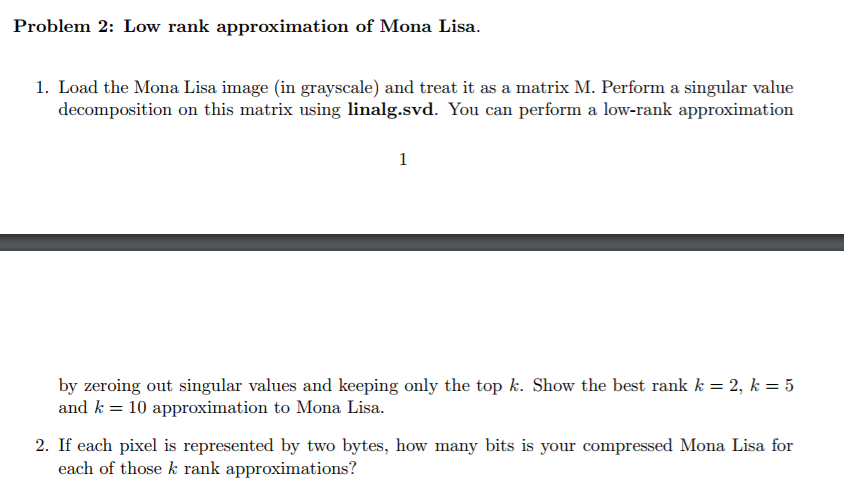

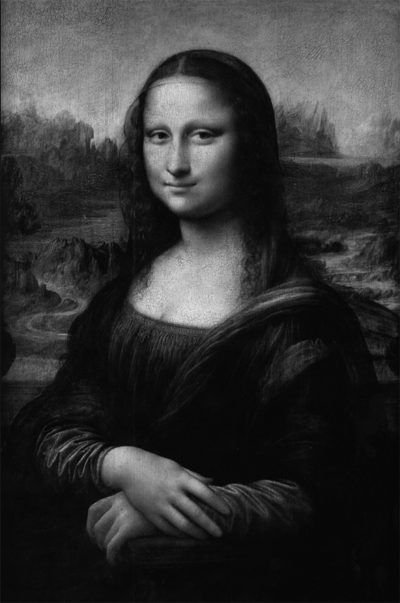

In [9]:
mLisa = misc.imread("mona_lisa.png", flatten = True)

In [10]:
U, S, V = np.linalg.svd(mLisa, full_matrices = False)

In [19]:
def LRA(k):
    print "For rank %d" %(k)
    Ut = U[:, :k]
    St = S[:k]
    Vt = V[:k, :]

    At = Ut.dot(np.diag(St).dot(Vt))
    plt.imshow(At, cmap='gray')
    
    n = Ut.shape[0]
    p = Vt.shape[1]
    bits = 16 * ( k * (n + p + 1))
    print "Number of bits needed is %d" %(bits)

For rank 2
Number of bits needed is 32128


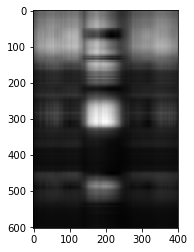

In [20]:
LRA(2)

For rank 5
Number of bits needed is 80320


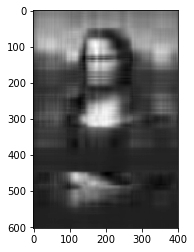

In [21]:
LRA(5)

For rank 10
Number of bits needed is 160640


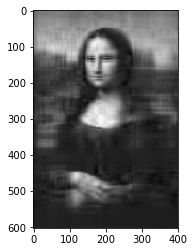

In [22]:
LRA(10)

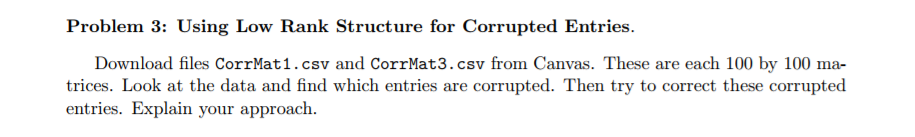

In [ ]:
#from pandas.plotting import scatter_matrix
data = pandas.read_csv("CorrMat1.csv")

pca with optimal rank
find outliers
replace outliers with mean

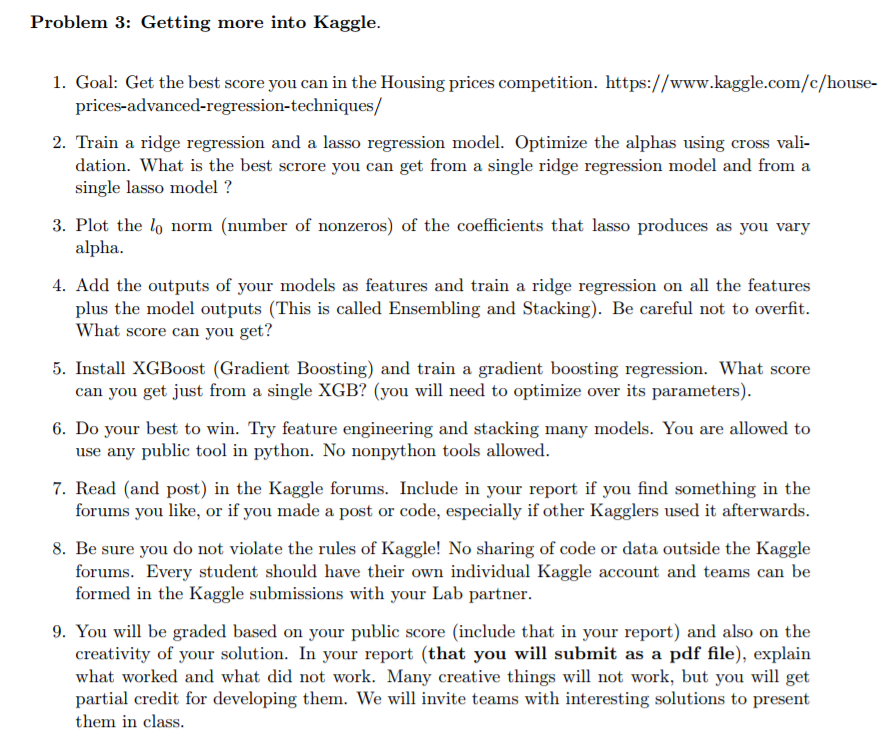

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'png'
%matplotlib inline

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

rmse_cv(model_lasso).mean()

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [ ]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
Out[24]:

model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

preds = 0.7*lasso_preds + 0.3*xgb_preds

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)